In [1]:
import glob #to read the files
import json #to work if .json
import numpy as np #to math
import pandas as pd #to save the data
import math #to convertion calculus
from astropy.time import Time #to time converting
from astropy import units #time correction
from astropy.coordinates import SkyCoord #time correction
from scipy import interpolate #to interpolate the wavelength and flux
from tabulate import tabulate #to export in table format
from scipy.interpolate import interp1d
#import scipy.optimize as opt
from scipy import optimize
from scipy import signal
import os.path
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from scipy import stats
import os.path 
import sncosmo
import scipy.interpolate as interp
from scipy.integrate import quad

In [2]:
name = "SN2012fr.json"

In [3]:
with open(name, "r") as read_file:
    data = json.load(read_file)

In [4]:
url = name
if url.endswith('.json'):
    url = url[:-5]

In [5]:
%run ./functions.ipynb

In [6]:
redshift = redshift_value(data[url])

0.0054


In [7]:
t0 = max_time(data[url])

In [8]:
system = []
mag = []
time = []

In [9]:
for i in range(0,len(data[url]["photometry"])):
               
    #if "system" in data[url]["photometry"][i]:
    if "band" in data[url]["photometry"][i]:
        
        if data[url]["photometry"][i]["band"] == "B":

            mag.append(float(data[url]["photometry"][i]["magnitude"]))
            time.append(float(data[url]["photometry"][i]["time"]))

            #system.append(data[url]["photometry"][i]["system"])


In [10]:
ab = sncosmo.get_magsystem('ab')

In [11]:
ab = sncosmo.get_magsystem('ab')

In [12]:
for i in range(0,len(mag)):
    
    mag[i] = ab.band_flux_to_mag(mag[i], 'cspb')

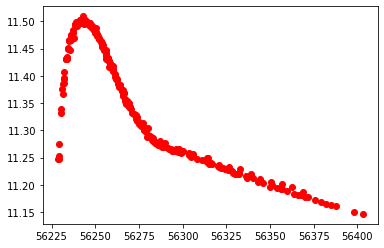

In [13]:
plt.plot(time, mag, 'ro')
plt.show()

In [14]:
file = open("SN2012fr.dat")
lines = file.readlines()
file.close()

xtemp = []

for line in lines:

    if line.startswith('#'): continue
    co=line.rstrip().replace('INDEF','Nan').split()

    xtemp.append(co[0])

xtemp = np.array(xtemp, dtype=float)

In [15]:
x = np.linspace(-10,50,61)
y = np.linspace(3300,8500,521)

In [16]:
z = np.reshape(xtemp, (521, 61))

zz = []
xx = []
yy = []

for i in range(0,len(y)):

    for j in range(0,len(x)):

        zz.append(z[i][j]*10**(13))
        xx.append(x[j])
        yy.append(y[i])

In [17]:
def surface(x_value, y_value):
    
    z_value = interp.griddata((xx,yy),zz,(x_value,y_value),method='cubic')
    
    return z_value

In [18]:
surface(0, 4000)

array(1.34561)

In [24]:
def surface_int(x_value):
    
    return quad(surface, 4000, 8000, args=(x_value))[0]

In [ ]:
surface_int(0)